# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

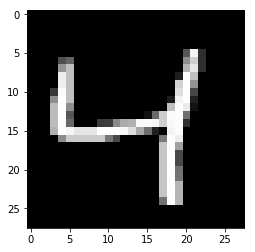

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [24]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

print(mnist.train.images.shape)
image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name="inputs")
targets_ = tf.placeholder(tf.float32, (None, image_size), name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits =  tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

(60000, 784)


## Training

In [25]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [26]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6931
Epoch: 1/20... Training loss: 0.6918
Epoch: 1/20... Training loss: 0.6906
Epoch: 1/20... Training loss: 0.6892
Epoch: 1/20... Training loss: 0.6872
Epoch: 1/20... Training loss: 0.6851
Epoch: 1/20... Training loss: 0.6827
Epoch: 1/20... Training loss: 0.6797
Epoch: 1/20... Training loss: 0.6763
Epoch: 1/20... Training loss: 0.6727
Epoch: 1/20... Training loss: 0.6683
Epoch: 1/20... Training loss: 0.6636
Epoch: 1/20... Training loss: 0.6584
Epoch: 1/20... Training loss: 0.6521
Epoch: 1/20... Training loss: 0.6463
Epoch: 1/20... Training loss: 0.6398
Epoch: 1/20... Training loss: 0.6329
Epoch: 1/20... Training loss: 0.6251
Epoch: 1/20... Training loss: 0.6171
Epoch: 1/20... Training loss: 0.6090
Epoch: 1/20... Training loss: 0.5983
Epoch: 1/20... Training loss: 0.5904
Epoch: 1/20... Training loss: 0.5797
Epoch: 1/20... Training loss: 0.5699
Epoch: 1/20... Training loss: 0.5605
Epoch: 1/20... Training loss: 0.5487
Epoch: 1/20... Training loss: 0.5377
E

Epoch: 1/20... Training loss: 0.2564
Epoch: 1/20... Training loss: 0.2504
Epoch: 1/20... Training loss: 0.2525
Epoch: 1/20... Training loss: 0.2585
Epoch: 1/20... Training loss: 0.2592
Epoch: 1/20... Training loss: 0.2567
Epoch: 1/20... Training loss: 0.2489
Epoch: 1/20... Training loss: 0.2571
Epoch: 1/20... Training loss: 0.2561
Epoch: 1/20... Training loss: 0.2510
Epoch: 1/20... Training loss: 0.2514
Epoch: 1/20... Training loss: 0.2497
Epoch: 1/20... Training loss: 0.2502
Epoch: 1/20... Training loss: 0.2538
Epoch: 1/20... Training loss: 0.2556
Epoch: 1/20... Training loss: 0.2559
Epoch: 1/20... Training loss: 0.2501
Epoch: 1/20... Training loss: 0.2488
Epoch: 1/20... Training loss: 0.2518
Epoch: 1/20... Training loss: 0.2579
Epoch: 1/20... Training loss: 0.2538
Epoch: 1/20... Training loss: 0.2570
Epoch: 1/20... Training loss: 0.2533
Epoch: 1/20... Training loss: 0.2430
Epoch: 1/20... Training loss: 0.2487
Epoch: 1/20... Training loss: 0.2470
Epoch: 1/20... Training loss: 0.2473
E

Epoch: 2/20... Training loss: 0.2168
Epoch: 2/20... Training loss: 0.2113
Epoch: 2/20... Training loss: 0.2158
Epoch: 2/20... Training loss: 0.2186
Epoch: 2/20... Training loss: 0.2192
Epoch: 2/20... Training loss: 0.2138
Epoch: 2/20... Training loss: 0.2142
Epoch: 2/20... Training loss: 0.2105
Epoch: 2/20... Training loss: 0.2199
Epoch: 2/20... Training loss: 0.2181
Epoch: 2/20... Training loss: 0.2153
Epoch: 2/20... Training loss: 0.2097
Epoch: 2/20... Training loss: 0.2149
Epoch: 2/20... Training loss: 0.2151
Epoch: 2/20... Training loss: 0.2148
Epoch: 2/20... Training loss: 0.2089
Epoch: 2/20... Training loss: 0.2085
Epoch: 2/20... Training loss: 0.2143
Epoch: 2/20... Training loss: 0.2101
Epoch: 2/20... Training loss: 0.2135
Epoch: 2/20... Training loss: 0.2092
Epoch: 2/20... Training loss: 0.2199
Epoch: 2/20... Training loss: 0.2164
Epoch: 2/20... Training loss: 0.2148
Epoch: 2/20... Training loss: 0.2143
Epoch: 2/20... Training loss: 0.2063
Epoch: 2/20... Training loss: 0.2119
E

Epoch: 3/20... Training loss: 0.1973
Epoch: 3/20... Training loss: 0.1827
Epoch: 3/20... Training loss: 0.1912
Epoch: 3/20... Training loss: 0.1898
Epoch: 3/20... Training loss: 0.1854
Epoch: 3/20... Training loss: 0.1908
Epoch: 3/20... Training loss: 0.1918
Epoch: 3/20... Training loss: 0.1911
Epoch: 3/20... Training loss: 0.1917
Epoch: 3/20... Training loss: 0.1960
Epoch: 3/20... Training loss: 0.1893
Epoch: 3/20... Training loss: 0.1962
Epoch: 3/20... Training loss: 0.1878
Epoch: 3/20... Training loss: 0.1912
Epoch: 3/20... Training loss: 0.1907
Epoch: 3/20... Training loss: 0.1918
Epoch: 3/20... Training loss: 0.1908
Epoch: 3/20... Training loss: 0.1975
Epoch: 3/20... Training loss: 0.1901
Epoch: 3/20... Training loss: 0.1880
Epoch: 3/20... Training loss: 0.1935
Epoch: 3/20... Training loss: 0.1902
Epoch: 3/20... Training loss: 0.1980
Epoch: 3/20... Training loss: 0.1937
Epoch: 3/20... Training loss: 0.1901
Epoch: 3/20... Training loss: 0.1921
Epoch: 3/20... Training loss: 0.1940
E

Epoch: 4/20... Training loss: 0.1857
Epoch: 4/20... Training loss: 0.1877
Epoch: 4/20... Training loss: 0.1841
Epoch: 4/20... Training loss: 0.1854
Epoch: 4/20... Training loss: 0.1896
Epoch: 4/20... Training loss: 0.1870
Epoch: 4/20... Training loss: 0.1874
Epoch: 4/20... Training loss: 0.1868
Epoch: 4/20... Training loss: 0.1868
Epoch: 4/20... Training loss: 0.1933
Epoch: 4/20... Training loss: 0.1801
Epoch: 4/20... Training loss: 0.1866
Epoch: 4/20... Training loss: 0.1896
Epoch: 4/20... Training loss: 0.1809
Epoch: 4/20... Training loss: 0.1819
Epoch: 4/20... Training loss: 0.1866
Epoch: 4/20... Training loss: 0.1879
Epoch: 4/20... Training loss: 0.1894
Epoch: 4/20... Training loss: 0.1869
Epoch: 4/20... Training loss: 0.1822
Epoch: 4/20... Training loss: 0.1702
Epoch: 4/20... Training loss: 0.1862
Epoch: 4/20... Training loss: 0.1788
Epoch: 4/20... Training loss: 0.1875
Epoch: 4/20... Training loss: 0.1829
Epoch: 4/20... Training loss: 0.1794
Epoch: 4/20... Training loss: 0.1830
E

Epoch: 4/20... Training loss: 0.1786
Epoch: 4/20... Training loss: 0.1700
Epoch: 4/20... Training loss: 0.1760
Epoch: 4/20... Training loss: 0.1776
Epoch: 4/20... Training loss: 0.1835
Epoch: 4/20... Training loss: 0.1810
Epoch: 4/20... Training loss: 0.1816
Epoch: 4/20... Training loss: 0.1802
Epoch: 4/20... Training loss: 0.1885
Epoch: 4/20... Training loss: 0.1798
Epoch: 4/20... Training loss: 0.1825
Epoch: 4/20... Training loss: 0.1836
Epoch: 5/20... Training loss: 0.1811
Epoch: 5/20... Training loss: 0.1854
Epoch: 5/20... Training loss: 0.1838
Epoch: 5/20... Training loss: 0.1797
Epoch: 5/20... Training loss: 0.1770
Epoch: 5/20... Training loss: 0.1848
Epoch: 5/20... Training loss: 0.1727
Epoch: 5/20... Training loss: 0.1759
Epoch: 5/20... Training loss: 0.1811
Epoch: 5/20... Training loss: 0.1837
Epoch: 5/20... Training loss: 0.1833
Epoch: 5/20... Training loss: 0.1835
Epoch: 5/20... Training loss: 0.1775
Epoch: 5/20... Training loss: 0.1809
Epoch: 5/20... Training loss: 0.1752
E

Epoch: 5/20... Training loss: 0.1815
Epoch: 5/20... Training loss: 0.1782
Epoch: 5/20... Training loss: 0.1846
Epoch: 5/20... Training loss: 0.1864
Epoch: 5/20... Training loss: 0.1738
Epoch: 5/20... Training loss: 0.1782
Epoch: 5/20... Training loss: 0.1731
Epoch: 5/20... Training loss: 0.1800
Epoch: 5/20... Training loss: 0.1758
Epoch: 5/20... Training loss: 0.1791
Epoch: 5/20... Training loss: 0.1809
Epoch: 5/20... Training loss: 0.1752
Epoch: 5/20... Training loss: 0.1774
Epoch: 5/20... Training loss: 0.1825
Epoch: 5/20... Training loss: 0.1856
Epoch: 5/20... Training loss: 0.1790
Epoch: 5/20... Training loss: 0.1748
Epoch: 5/20... Training loss: 0.1715
Epoch: 5/20... Training loss: 0.1815
Epoch: 5/20... Training loss: 0.1832
Epoch: 5/20... Training loss: 0.1854
Epoch: 5/20... Training loss: 0.1795
Epoch: 5/20... Training loss: 0.1809
Epoch: 5/20... Training loss: 0.1793
Epoch: 5/20... Training loss: 0.1770
Epoch: 5/20... Training loss: 0.1758
Epoch: 5/20... Training loss: 0.1751
E

Epoch: 6/20... Training loss: 0.1755
Epoch: 6/20... Training loss: 0.1813
Epoch: 6/20... Training loss: 0.1740
Epoch: 6/20... Training loss: 0.1782
Epoch: 6/20... Training loss: 0.1726
Epoch: 6/20... Training loss: 0.1800
Epoch: 6/20... Training loss: 0.1729
Epoch: 6/20... Training loss: 0.1747
Epoch: 6/20... Training loss: 0.1762
Epoch: 6/20... Training loss: 0.1785
Epoch: 6/20... Training loss: 0.1756
Epoch: 6/20... Training loss: 0.1748
Epoch: 6/20... Training loss: 0.1713
Epoch: 6/20... Training loss: 0.1777
Epoch: 6/20... Training loss: 0.1699
Epoch: 6/20... Training loss: 0.1751
Epoch: 6/20... Training loss: 0.1766
Epoch: 6/20... Training loss: 0.1841
Epoch: 6/20... Training loss: 0.1800
Epoch: 6/20... Training loss: 0.1708
Epoch: 6/20... Training loss: 0.1852
Epoch: 6/20... Training loss: 0.1798
Epoch: 6/20... Training loss: 0.1803
Epoch: 6/20... Training loss: 0.1750
Epoch: 6/20... Training loss: 0.1767
Epoch: 6/20... Training loss: 0.1790
Epoch: 6/20... Training loss: 0.1758
E

Epoch: 7/20... Training loss: 0.1707
Epoch: 7/20... Training loss: 0.1752
Epoch: 7/20... Training loss: 0.1753
Epoch: 7/20... Training loss: 0.1826
Epoch: 7/20... Training loss: 0.1788
Epoch: 7/20... Training loss: 0.1684
Epoch: 7/20... Training loss: 0.1746
Epoch: 7/20... Training loss: 0.1806
Epoch: 7/20... Training loss: 0.1756
Epoch: 7/20... Training loss: 0.1748
Epoch: 7/20... Training loss: 0.1783
Epoch: 7/20... Training loss: 0.1782
Epoch: 7/20... Training loss: 0.1755
Epoch: 7/20... Training loss: 0.1766
Epoch: 7/20... Training loss: 0.1729
Epoch: 7/20... Training loss: 0.1722
Epoch: 7/20... Training loss: 0.1752
Epoch: 7/20... Training loss: 0.1763
Epoch: 7/20... Training loss: 0.1785
Epoch: 7/20... Training loss: 0.1804
Epoch: 7/20... Training loss: 0.1790
Epoch: 7/20... Training loss: 0.1816
Epoch: 7/20... Training loss: 0.1739
Epoch: 7/20... Training loss: 0.1781
Epoch: 7/20... Training loss: 0.1801
Epoch: 7/20... Training loss: 0.1819
Epoch: 7/20... Training loss: 0.1683
E

Epoch: 8/20... Training loss: 0.1706
Epoch: 8/20... Training loss: 0.1764
Epoch: 8/20... Training loss: 0.1747
Epoch: 8/20... Training loss: 0.1800
Epoch: 8/20... Training loss: 0.1751
Epoch: 8/20... Training loss: 0.1754
Epoch: 8/20... Training loss: 0.1712
Epoch: 8/20... Training loss: 0.1738
Epoch: 8/20... Training loss: 0.1711
Epoch: 8/20... Training loss: 0.1764
Epoch: 8/20... Training loss: 0.1730
Epoch: 8/20... Training loss: 0.1689
Epoch: 8/20... Training loss: 0.1748
Epoch: 8/20... Training loss: 0.1775
Epoch: 8/20... Training loss: 0.1720
Epoch: 8/20... Training loss: 0.1755
Epoch: 8/20... Training loss: 0.1744
Epoch: 8/20... Training loss: 0.1690
Epoch: 8/20... Training loss: 0.1778
Epoch: 8/20... Training loss: 0.1725
Epoch: 8/20... Training loss: 0.1769
Epoch: 8/20... Training loss: 0.1731
Epoch: 8/20... Training loss: 0.1731
Epoch: 8/20... Training loss: 0.1715
Epoch: 8/20... Training loss: 0.1769
Epoch: 8/20... Training loss: 0.1718
Epoch: 8/20... Training loss: 0.1672
E

Epoch: 8/20... Training loss: 0.1703
Epoch: 8/20... Training loss: 0.1762
Epoch: 8/20... Training loss: 0.1677
Epoch: 8/20... Training loss: 0.1703
Epoch: 8/20... Training loss: 0.1761
Epoch: 8/20... Training loss: 0.1747
Epoch: 8/20... Training loss: 0.1697
Epoch: 8/20... Training loss: 0.1750
Epoch: 8/20... Training loss: 0.1727
Epoch: 8/20... Training loss: 0.1743
Epoch: 8/20... Training loss: 0.1686
Epoch: 8/20... Training loss: 0.1694
Epoch: 8/20... Training loss: 0.1748
Epoch: 8/20... Training loss: 0.1749
Epoch: 8/20... Training loss: 0.1711
Epoch: 8/20... Training loss: 0.1753
Epoch: 8/20... Training loss: 0.1622
Epoch: 8/20... Training loss: 0.1731
Epoch: 8/20... Training loss: 0.1712
Epoch: 8/20... Training loss: 0.1749
Epoch: 8/20... Training loss: 0.1755
Epoch: 8/20... Training loss: 0.1723
Epoch: 8/20... Training loss: 0.1764
Epoch: 8/20... Training loss: 0.1763
Epoch: 8/20... Training loss: 0.1732
Epoch: 8/20... Training loss: 0.1694
Epoch: 8/20... Training loss: 0.1709
E

Epoch: 9/20... Training loss: 0.1748
Epoch: 9/20... Training loss: 0.1705
Epoch: 9/20... Training loss: 0.1637
Epoch: 9/20... Training loss: 0.1665
Epoch: 9/20... Training loss: 0.1714
Epoch: 9/20... Training loss: 0.1675
Epoch: 9/20... Training loss: 0.1657
Epoch: 9/20... Training loss: 0.1710
Epoch: 9/20... Training loss: 0.1692
Epoch: 9/20... Training loss: 0.1735
Epoch: 9/20... Training loss: 0.1695
Epoch: 9/20... Training loss: 0.1717
Epoch: 9/20... Training loss: 0.1774
Epoch: 9/20... Training loss: 0.1690
Epoch: 9/20... Training loss: 0.1717
Epoch: 9/20... Training loss: 0.1736
Epoch: 9/20... Training loss: 0.1741
Epoch: 9/20... Training loss: 0.1668
Epoch: 9/20... Training loss: 0.1684
Epoch: 9/20... Training loss: 0.1651
Epoch: 9/20... Training loss: 0.1739
Epoch: 9/20... Training loss: 0.1755
Epoch: 9/20... Training loss: 0.1779
Epoch: 9/20... Training loss: 0.1772
Epoch: 9/20... Training loss: 0.1709
Epoch: 9/20... Training loss: 0.1762
Epoch: 9/20... Training loss: 0.1709
E

Epoch: 10/20... Training loss: 0.1647
Epoch: 10/20... Training loss: 0.1806
Epoch: 10/20... Training loss: 0.1696
Epoch: 10/20... Training loss: 0.1672
Epoch: 10/20... Training loss: 0.1695
Epoch: 10/20... Training loss: 0.1734
Epoch: 10/20... Training loss: 0.1717
Epoch: 10/20... Training loss: 0.1689
Epoch: 10/20... Training loss: 0.1707
Epoch: 10/20... Training loss: 0.1713
Epoch: 10/20... Training loss: 0.1720
Epoch: 10/20... Training loss: 0.1689
Epoch: 10/20... Training loss: 0.1682
Epoch: 10/20... Training loss: 0.1789
Epoch: 10/20... Training loss: 0.1710
Epoch: 10/20... Training loss: 0.1722
Epoch: 10/20... Training loss: 0.1747
Epoch: 10/20... Training loss: 0.1632
Epoch: 10/20... Training loss: 0.1746
Epoch: 10/20... Training loss: 0.1689
Epoch: 10/20... Training loss: 0.1641
Epoch: 10/20... Training loss: 0.1712
Epoch: 10/20... Training loss: 0.1685
Epoch: 10/20... Training loss: 0.1733
Epoch: 10/20... Training loss: 0.1731
Epoch: 10/20... Training loss: 0.1745
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1706
Epoch: 11/20... Training loss: 0.1691
Epoch: 11/20... Training loss: 0.1694
Epoch: 11/20... Training loss: 0.1713
Epoch: 11/20... Training loss: 0.1692
Epoch: 11/20... Training loss: 0.1631
Epoch: 11/20... Training loss: 0.1627
Epoch: 11/20... Training loss: 0.1614
Epoch: 11/20... Training loss: 0.1682
Epoch: 11/20... Training loss: 0.1713
Epoch: 11/20... Training loss: 0.1666
Epoch: 11/20... Training loss: 0.1689
Epoch: 11/20... Training loss: 0.1635
Epoch: 11/20... Training loss: 0.1686
Epoch: 11/20... Training loss: 0.1662
Epoch: 11/20... Training loss: 0.1714
Epoch: 11/20... Training loss: 0.1627
Epoch: 11/20... Training loss: 0.1727
Epoch: 11/20... Training loss: 0.1721
Epoch: 11/20... Training loss: 0.1690
Epoch: 11/20... Training loss: 0.1747
Epoch: 11/20... Training loss: 0.1732
Epoch: 11/20... Training loss: 0.1707
Epoch: 11/20... Training loss: 0.1726
Epoch: 11/20... Training loss: 0.1697
Epoch: 11/20... Training loss: 0.1669
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1738
Epoch: 12/20... Training loss: 0.1732
Epoch: 12/20... Training loss: 0.1758
Epoch: 12/20... Training loss: 0.1685
Epoch: 12/20... Training loss: 0.1670
Epoch: 12/20... Training loss: 0.1742
Epoch: 12/20... Training loss: 0.1723
Epoch: 12/20... Training loss: 0.1650
Epoch: 12/20... Training loss: 0.1707
Epoch: 12/20... Training loss: 0.1694
Epoch: 12/20... Training loss: 0.1655
Epoch: 12/20... Training loss: 0.1675
Epoch: 12/20... Training loss: 0.1682
Epoch: 12/20... Training loss: 0.1707
Epoch: 12/20... Training loss: 0.1708
Epoch: 12/20... Training loss: 0.1730
Epoch: 12/20... Training loss: 0.1731
Epoch: 12/20... Training loss: 0.1688
Epoch: 12/20... Training loss: 0.1670
Epoch: 12/20... Training loss: 0.1669
Epoch: 12/20... Training loss: 0.1667
Epoch: 12/20... Training loss: 0.1672
Epoch: 12/20... Training loss: 0.1725
Epoch: 12/20... Training loss: 0.1677
Epoch: 12/20... Training loss: 0.1670
Epoch: 12/20... Training loss: 0.1680
Epoch: 12/20

Epoch: 12/20... Training loss: 0.1702
Epoch: 12/20... Training loss: 0.1700
Epoch: 12/20... Training loss: 0.1725
Epoch: 12/20... Training loss: 0.1657
Epoch: 12/20... Training loss: 0.1698
Epoch: 12/20... Training loss: 0.1672
Epoch: 12/20... Training loss: 0.1698
Epoch: 12/20... Training loss: 0.1625
Epoch: 12/20... Training loss: 0.1719
Epoch: 12/20... Training loss: 0.1731
Epoch: 12/20... Training loss: 0.1668
Epoch: 12/20... Training loss: 0.1646
Epoch: 12/20... Training loss: 0.1677
Epoch: 12/20... Training loss: 0.1709
Epoch: 12/20... Training loss: 0.1753
Epoch: 12/20... Training loss: 0.1729
Epoch: 12/20... Training loss: 0.1674
Epoch: 12/20... Training loss: 0.1694
Epoch: 12/20... Training loss: 0.1671
Epoch: 12/20... Training loss: 0.1654
Epoch: 12/20... Training loss: 0.1602
Epoch: 12/20... Training loss: 0.1724
Epoch: 12/20... Training loss: 0.1698
Epoch: 12/20... Training loss: 0.1682
Epoch: 12/20... Training loss: 0.1721
Epoch: 12/20... Training loss: 0.1671
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1693
Epoch: 13/20... Training loss: 0.1728
Epoch: 13/20... Training loss: 0.1719
Epoch: 13/20... Training loss: 0.1648
Epoch: 13/20... Training loss: 0.1683
Epoch: 13/20... Training loss: 0.1670
Epoch: 13/20... Training loss: 0.1666
Epoch: 13/20... Training loss: 0.1726
Epoch: 13/20... Training loss: 0.1704
Epoch: 13/20... Training loss: 0.1680
Epoch: 13/20... Training loss: 0.1610
Epoch: 13/20... Training loss: 0.1688
Epoch: 13/20... Training loss: 0.1714
Epoch: 13/20... Training loss: 0.1705
Epoch: 13/20... Training loss: 0.1613
Epoch: 13/20... Training loss: 0.1687
Epoch: 13/20... Training loss: 0.1646
Epoch: 13/20... Training loss: 0.1694
Epoch: 13/20... Training loss: 0.1703
Epoch: 13/20... Training loss: 0.1692
Epoch: 13/20... Training loss: 0.1706
Epoch: 13/20... Training loss: 0.1677
Epoch: 13/20... Training loss: 0.1700
Epoch: 13/20... Training loss: 0.1687
Epoch: 13/20... Training loss: 0.1707
Epoch: 13/20... Training loss: 0.1588
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1659
Epoch: 14/20... Training loss: 0.1666
Epoch: 14/20... Training loss: 0.1723
Epoch: 14/20... Training loss: 0.1681
Epoch: 14/20... Training loss: 0.1730
Epoch: 14/20... Training loss: 0.1705
Epoch: 14/20... Training loss: 0.1697
Epoch: 14/20... Training loss: 0.1644
Epoch: 14/20... Training loss: 0.1753
Epoch: 14/20... Training loss: 0.1669
Epoch: 14/20... Training loss: 0.1664
Epoch: 14/20... Training loss: 0.1730
Epoch: 14/20... Training loss: 0.1763
Epoch: 14/20... Training loss: 0.1637
Epoch: 14/20... Training loss: 0.1614
Epoch: 14/20... Training loss: 0.1661
Epoch: 14/20... Training loss: 0.1587
Epoch: 14/20... Training loss: 0.1699
Epoch: 14/20... Training loss: 0.1730
Epoch: 14/20... Training loss: 0.1722
Epoch: 14/20... Training loss: 0.1649
Epoch: 14/20... Training loss: 0.1690
Epoch: 14/20... Training loss: 0.1692
Epoch: 14/20... Training loss: 0.1596
Epoch: 14/20... Training loss: 0.1703
Epoch: 14/20... Training loss: 0.1682
Epoch: 14/20

Epoch: 15/20... Training loss: 0.1688
Epoch: 15/20... Training loss: 0.1660
Epoch: 15/20... Training loss: 0.1693
Epoch: 15/20... Training loss: 0.1683
Epoch: 15/20... Training loss: 0.1668
Epoch: 15/20... Training loss: 0.1668
Epoch: 15/20... Training loss: 0.1624
Epoch: 15/20... Training loss: 0.1685
Epoch: 15/20... Training loss: 0.1681
Epoch: 15/20... Training loss: 0.1695
Epoch: 15/20... Training loss: 0.1607
Epoch: 15/20... Training loss: 0.1714
Epoch: 15/20... Training loss: 0.1695
Epoch: 15/20... Training loss: 0.1683
Epoch: 15/20... Training loss: 0.1696
Epoch: 15/20... Training loss: 0.1617
Epoch: 15/20... Training loss: 0.1650
Epoch: 15/20... Training loss: 0.1641
Epoch: 15/20... Training loss: 0.1676
Epoch: 15/20... Training loss: 0.1642
Epoch: 15/20... Training loss: 0.1656
Epoch: 15/20... Training loss: 0.1677
Epoch: 15/20... Training loss: 0.1660
Epoch: 15/20... Training loss: 0.1728
Epoch: 15/20... Training loss: 0.1690
Epoch: 15/20... Training loss: 0.1682
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1581
Epoch: 16/20... Training loss: 0.1718
Epoch: 16/20... Training loss: 0.1676
Epoch: 16/20... Training loss: 0.1654
Epoch: 16/20... Training loss: 0.1725
Epoch: 16/20... Training loss: 0.1659
Epoch: 16/20... Training loss: 0.1699
Epoch: 16/20... Training loss: 0.1675
Epoch: 16/20... Training loss: 0.1691
Epoch: 16/20... Training loss: 0.1731
Epoch: 16/20... Training loss: 0.1725
Epoch: 16/20... Training loss: 0.1657
Epoch: 16/20... Training loss: 0.1685
Epoch: 16/20... Training loss: 0.1773
Epoch: 16/20... Training loss: 0.1657
Epoch: 16/20... Training loss: 0.1668
Epoch: 16/20... Training loss: 0.1624
Epoch: 16/20... Training loss: 0.1651
Epoch: 16/20... Training loss: 0.1665
Epoch: 16/20... Training loss: 0.1628
Epoch: 16/20... Training loss: 0.1659
Epoch: 16/20... Training loss: 0.1706
Epoch: 16/20... Training loss: 0.1612
Epoch: 16/20... Training loss: 0.1629
Epoch: 16/20... Training loss: 0.1670
Epoch: 16/20... Training loss: 0.1661
Epoch: 16/20

Epoch: 16/20... Training loss: 0.1669
Epoch: 16/20... Training loss: 0.1706
Epoch: 16/20... Training loss: 0.1629
Epoch: 16/20... Training loss: 0.1664
Epoch: 16/20... Training loss: 0.1608
Epoch: 16/20... Training loss: 0.1673
Epoch: 16/20... Training loss: 0.1668
Epoch: 16/20... Training loss: 0.1676
Epoch: 16/20... Training loss: 0.1701
Epoch: 16/20... Training loss: 0.1670
Epoch: 16/20... Training loss: 0.1728
Epoch: 16/20... Training loss: 0.1655
Epoch: 16/20... Training loss: 0.1677
Epoch: 16/20... Training loss: 0.1632
Epoch: 16/20... Training loss: 0.1645
Epoch: 16/20... Training loss: 0.1708
Epoch: 16/20... Training loss: 0.1672
Epoch: 16/20... Training loss: 0.1640
Epoch: 16/20... Training loss: 0.1687
Epoch: 16/20... Training loss: 0.1697
Epoch: 16/20... Training loss: 0.1693
Epoch: 16/20... Training loss: 0.1672
Epoch: 16/20... Training loss: 0.1610
Epoch: 16/20... Training loss: 0.1655
Epoch: 16/20... Training loss: 0.1671
Epoch: 16/20... Training loss: 0.1661
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1640
Epoch: 17/20... Training loss: 0.1656
Epoch: 17/20... Training loss: 0.1631
Epoch: 17/20... Training loss: 0.1713
Epoch: 17/20... Training loss: 0.1709
Epoch: 17/20... Training loss: 0.1699
Epoch: 17/20... Training loss: 0.1691
Epoch: 17/20... Training loss: 0.1718
Epoch: 17/20... Training loss: 0.1691
Epoch: 17/20... Training loss: 0.1648
Epoch: 17/20... Training loss: 0.1700
Epoch: 17/20... Training loss: 0.1742
Epoch: 17/20... Training loss: 0.1690
Epoch: 17/20... Training loss: 0.1652
Epoch: 17/20... Training loss: 0.1645
Epoch: 17/20... Training loss: 0.1731
Epoch: 17/20... Training loss: 0.1605
Epoch: 17/20... Training loss: 0.1669
Epoch: 17/20... Training loss: 0.1640
Epoch: 17/20... Training loss: 0.1700
Epoch: 17/20... Training loss: 0.1608
Epoch: 17/20... Training loss: 0.1613
Epoch: 17/20... Training loss: 0.1558
Epoch: 17/20... Training loss: 0.1679
Epoch: 17/20... Training loss: 0.1719
Epoch: 17/20... Training loss: 0.1637
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1671
Epoch: 18/20... Training loss: 0.1713
Epoch: 18/20... Training loss: 0.1641
Epoch: 18/20... Training loss: 0.1724
Epoch: 18/20... Training loss: 0.1683
Epoch: 18/20... Training loss: 0.1656
Epoch: 18/20... Training loss: 0.1650
Epoch: 18/20... Training loss: 0.1692
Epoch: 18/20... Training loss: 0.1697
Epoch: 18/20... Training loss: 0.1652
Epoch: 18/20... Training loss: 0.1660
Epoch: 18/20... Training loss: 0.1665
Epoch: 18/20... Training loss: 0.1705
Epoch: 18/20... Training loss: 0.1651
Epoch: 18/20... Training loss: 0.1654
Epoch: 18/20... Training loss: 0.1630
Epoch: 18/20... Training loss: 0.1724
Epoch: 18/20... Training loss: 0.1649
Epoch: 18/20... Training loss: 0.1587
Epoch: 18/20... Training loss: 0.1582
Epoch: 18/20... Training loss: 0.1681
Epoch: 18/20... Training loss: 0.1637
Epoch: 18/20... Training loss: 0.1711
Epoch: 18/20... Training loss: 0.1687
Epoch: 18/20... Training loss: 0.1644
Epoch: 18/20... Training loss: 0.1639
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1686
Epoch: 19/20... Training loss: 0.1629
Epoch: 19/20... Training loss: 0.1668
Epoch: 19/20... Training loss: 0.1697
Epoch: 19/20... Training loss: 0.1627
Epoch: 19/20... Training loss: 0.1606
Epoch: 19/20... Training loss: 0.1622
Epoch: 19/20... Training loss: 0.1656
Epoch: 19/20... Training loss: 0.1569
Epoch: 19/20... Training loss: 0.1674
Epoch: 19/20... Training loss: 0.1652
Epoch: 19/20... Training loss: 0.1655
Epoch: 19/20... Training loss: 0.1675
Epoch: 19/20... Training loss: 0.1677
Epoch: 19/20... Training loss: 0.1702
Epoch: 19/20... Training loss: 0.1675
Epoch: 19/20... Training loss: 0.1624
Epoch: 19/20... Training loss: 0.1658
Epoch: 19/20... Training loss: 0.1708
Epoch: 19/20... Training loss: 0.1785
Epoch: 19/20... Training loss: 0.1603
Epoch: 19/20... Training loss: 0.1799
Epoch: 19/20... Training loss: 0.1663
Epoch: 19/20... Training loss: 0.1627
Epoch: 19/20... Training loss: 0.1684
Epoch: 19/20... Training loss: 0.1744
Epoch: 19/20

Epoch: 19/20... Training loss: 0.1632
Epoch: 19/20... Training loss: 0.1696
Epoch: 19/20... Training loss: 0.1602
Epoch: 19/20... Training loss: 0.1718
Epoch: 19/20... Training loss: 0.1709
Epoch: 19/20... Training loss: 0.1629
Epoch: 19/20... Training loss: 0.1694
Epoch: 19/20... Training loss: 0.1677
Epoch: 20/20... Training loss: 0.1690
Epoch: 20/20... Training loss: 0.1577
Epoch: 20/20... Training loss: 0.1678
Epoch: 20/20... Training loss: 0.1646
Epoch: 20/20... Training loss: 0.1698
Epoch: 20/20... Training loss: 0.1701
Epoch: 20/20... Training loss: 0.1630
Epoch: 20/20... Training loss: 0.1724
Epoch: 20/20... Training loss: 0.1649
Epoch: 20/20... Training loss: 0.1692
Epoch: 20/20... Training loss: 0.1667
Epoch: 20/20... Training loss: 0.1696
Epoch: 20/20... Training loss: 0.1672
Epoch: 20/20... Training loss: 0.1636
Epoch: 20/20... Training loss: 0.1655
Epoch: 20/20... Training loss: 0.1705
Epoch: 20/20... Training loss: 0.1686
Epoch: 20/20... Training loss: 0.1684
Epoch: 20/20

Epoch: 20/20... Training loss: 0.1683
Epoch: 20/20... Training loss: 0.1711
Epoch: 20/20... Training loss: 0.1729
Epoch: 20/20... Training loss: 0.1678
Epoch: 20/20... Training loss: 0.1604
Epoch: 20/20... Training loss: 0.1641
Epoch: 20/20... Training loss: 0.1684
Epoch: 20/20... Training loss: 0.1619
Epoch: 20/20... Training loss: 0.1657
Epoch: 20/20... Training loss: 0.1674
Epoch: 20/20... Training loss: 0.1660
Epoch: 20/20... Training loss: 0.1650
Epoch: 20/20... Training loss: 0.1660
Epoch: 20/20... Training loss: 0.1641
Epoch: 20/20... Training loss: 0.1713
Epoch: 20/20... Training loss: 0.1649
Epoch: 20/20... Training loss: 0.1680
Epoch: 20/20... Training loss: 0.1694
Epoch: 20/20... Training loss: 0.1646
Epoch: 20/20... Training loss: 0.1648
Epoch: 20/20... Training loss: 0.1690
Epoch: 20/20... Training loss: 0.1582
Epoch: 20/20... Training loss: 0.1633
Epoch: 20/20... Training loss: 0.1715
Epoch: 20/20... Training loss: 0.1618
Epoch: 20/20... Training loss: 0.1632
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

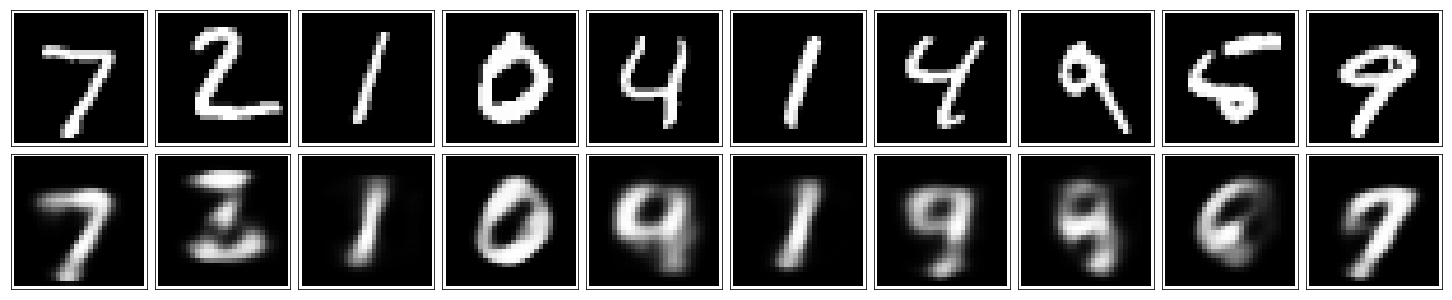

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [28]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.